In [1]:
import cv2                    
import matplotlib.pyplot as plt
import os
import numpy as np

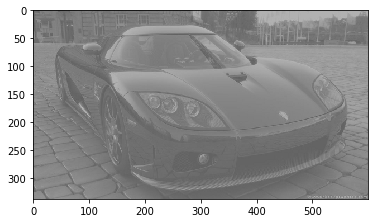

In [2]:
img=cv2.imread("car.png")
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [3]:
t=img.shape
height,width=t[0],t[1]
print(height,width) 
print(img[1][2])


338 600
106


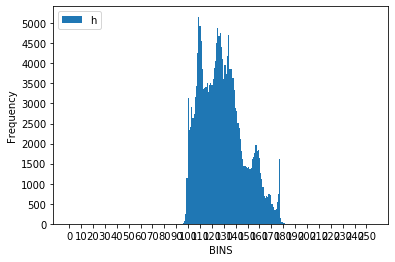

In [4]:
frequency=np.array([0]*256)            #creating BINS
bins=[i for i in range(0,256)]
grayvalues=[]
def createHistogram(img):
    
    for i in range(0,height):
        for j in range(0,width):
            grayvalue=img[i][j]
            grayvalues.append(grayvalue)
            frequency[grayvalue.astype(int)]=frequency[grayvalue.astype(int)]+1

    plt.xticks(np.arange(0, 255+1, 10.0))
    plt.yticks(np.arange(0, max(frequency),500))
    plt.bar(bins,frequency,width=1,align='center')
    plt.rcParams['figure.figsize']=[10,10]
    plt.xlabel("BINS")
    plt.ylabel("Frequency")
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()
    
createHistogram(img)  

In [5]:
def PMF(img,frequency):                 #to compute probability mass function-Pk/MN
    pmf=[]
    for i in frequency:
        pmf.append(i/(height*width))
#     print(pmf)
    return pmf

def CDF(pmf):                            #cumulative distributive function
    cdf=[]
    sum=0
    for i in pmf:
        sum=sum+i
        cdf.append(sum)
    return cdf
    

In [6]:
pmf=PMF(img,frequency)
cdf=CDF(pmf)

In [7]:
newBins=[]               #newbins
for i in cdf:
    a=round(i*(256-1))
#     print(a,end=" ")
    
    newBins.append(int(a))
# print(newBins)

In [8]:
newFreq=np.array([0]*256)
for i in range(0,256):
    f=frequency[i]
    index=newBins[i]
    newFreq[index]=newFreq[index]+f
# print(newFreq)

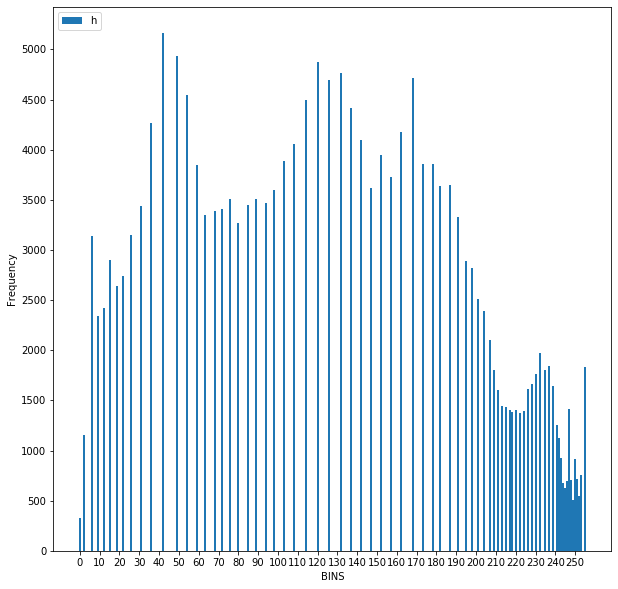

In [9]:
# printing equalised histogram

plt.xticks(np.arange(0, 255+1, 10.0))
plt.yticks(np.arange(0, max(newFreq),500))
plt.bar(bins,newFreq,width=1,align='center')
# plt.rcParams['figure.figsize']=[10,10]
plt.xlabel("BINS")
plt.ylabel("Frequency")
plt.legend(('histogram'), loc = 'upper left')
plt.show()

In [10]:
final=[]
for i in range(len(grayvalues)):
    value=grayvalues[i]
    newvalue=newBins[value]
    final.append(newvalue)
# print(final)


In [11]:
b = np.asarray(final).reshape((height,width))
# print(b)
c= b.astype('uint8')
cv2.imwrite("final.png", c)
# cv2.imshow('image',c)
# cv2.waitKey(0)

True

In [18]:
fin=cv2.imread("final.png")
img=cv2.imread("car.png")

In [16]:
plot_image = np.concatenate((img, fin), axis=1)

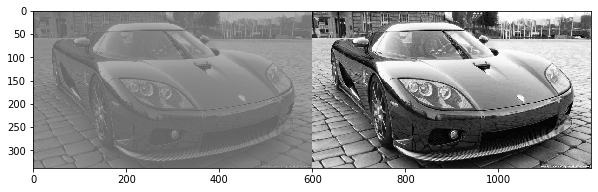

In [17]:
plt.imshow(plot_image)
plt.show()